In [3]:
import numpy as np
import pandas as pd

In [4]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

In [5]:
y = load_airline()

In [6]:
y.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', length=144)

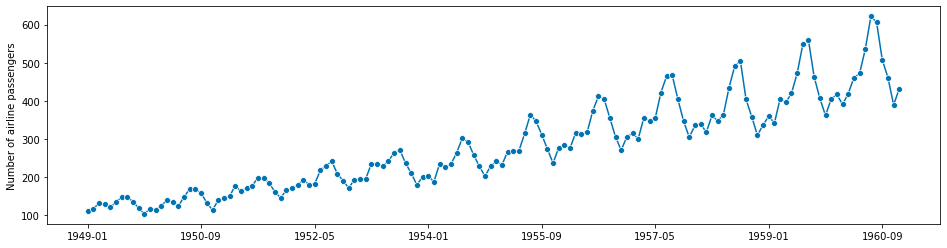

In [7]:
plot_series(y);

In [8]:
#Forecasting Horizon

In [9]:
fh = np.arange(1, 37)#goes till 36 months
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

This will ask for monthly predictions for the next three years.

In [10]:
fh = np.array([2,5])

In [11]:
fh 

array([2, 5])

this will predict only a 2nd and 5th month or stpe ahead.

In [12]:
from sktime.forecasting.base import ForecastingHorizon

In [13]:
fh = ForecastingHorizon(
pd.PeriodIndex(pd.date_range('1961-01', periods = 36, freq ='M')),
    is_relative=False
)

In [14]:
cutoff = pd.Period('1960-12', freq='M')

In [15]:
fh.to_relative(cutoff)

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36],
           dtype='int64', is_relative=True)

In [16]:
fh.to_absolute(cutoff)

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

In [17]:
from sktime.forecasting.naive import NaiveForecaster

In [18]:
forecaster = NaiveForecaster(strategy = 'last', sp =12)#use the last data value in the same month

In [19]:
forecaster.fit(y)

NaiveForecaster(sp=12)

In [20]:
y_pred = forecaster.predict(fh)

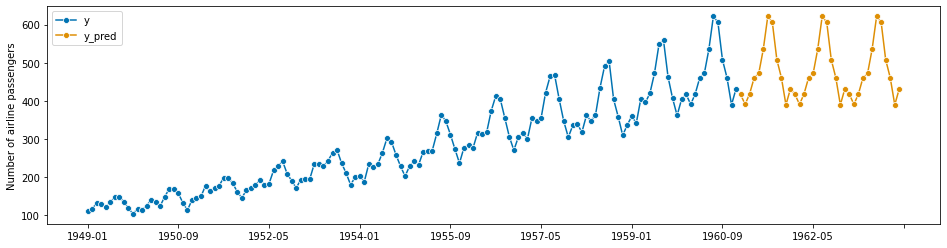

In [21]:
plot_series(y, y_pred, labels=['y', 'y_pred']);

Forecasting with exogenous data:

In [22]:
y = load_airline()


In [23]:
y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [24]:
#create dummy exogenous data:
X = pd.DataFrame(index=y.index)

In [25]:
fh = np.arange(1, 37)

In [26]:
forecaster = NaiveForecaster(strategy = "last", sp = 12)

In [27]:
#fit the forecaster:
forecaster.fit(y, X=X, fh=fh)

NaiveForecaster(sp=12)

In [28]:
#get the predictions
y_pred=forecaster.predict(X=X)#some forecasters might need the fh here only

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

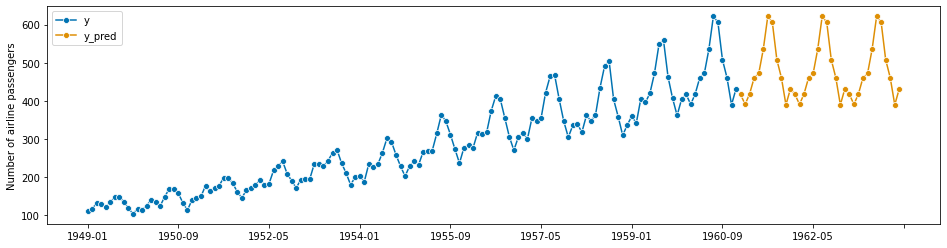

In [29]:
plot_series(y, y_pred, labels = ['y', 'y_pred'])

## Prediction intervals

In [30]:
from sktime.forecasting.theta import ThetaForecaster

In [31]:
y = load_airline()
fh=np.arange(1, 13)#twelve months

In [32]:
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y)
alpha = 0.05 #2.5%/97.5% intervals
y_pred, y_pred_ints = forecaster.predict(fh, return_pred_int=True, alpha = alpha)

In [33]:
y_pred_ints

,lower,upper
1961-01,413.873755,468.688317
1961-02,396.979011,462.124925
1961-03,454.013504,528.063109
1961-04,435.998232,517.990291
1961-05,436.352089,525.582418
1961-06,498.874797,594.798754
1961-07,553.282845,655.462879
1961-08,548.675556,656.750129
1961-09,468.520987,582.184821
1961-10,398.349800,517.340645


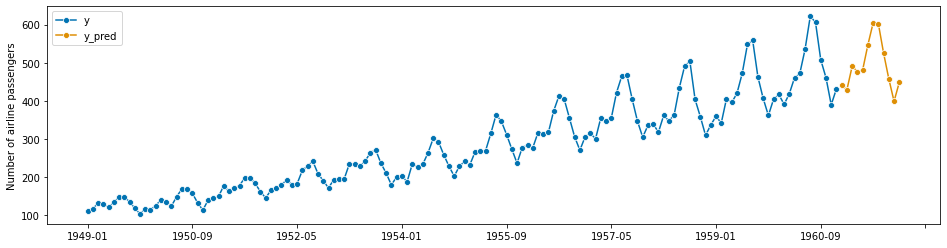

In [34]:
fig, ax =plot_series(y, y_pred, labels=['y', 'y_pred'])

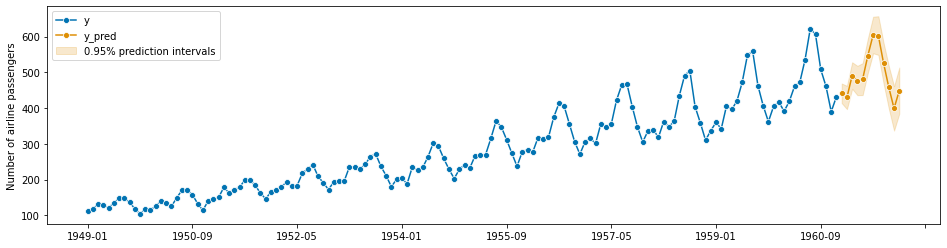

In [35]:
fig, ax = plot_series(y, y_pred, labels = ['y', 'y_pred'])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints['lower'],
    y_pred_ints['upper'],
    alpha = 0.2,
    color = ax.get_lines()[-1].get_c(),
    label=f'{1-alpha}% prediction intervals',
    
)
ax.legend();

## Evaluating model performance

### 1. Splitting into a temporal training and test set

In [36]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [37]:
y= load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)#36 months

108 36


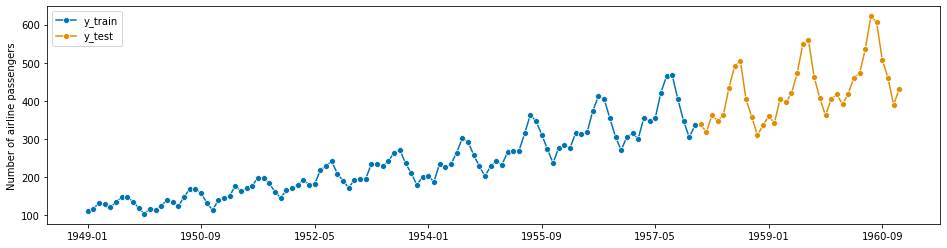

In [38]:
plot_series(y_train, y_test, labels= ['y_train', 'y_test']);
print(y_train.shape[0], y_test.shape[0])

### 2. Obtaining batch forecasts

In [39]:
fh=ForecastingHorizon(y_test.index, is_relative=False)

In [40]:
forecaster = NaiveForecaster(strategy='last', sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

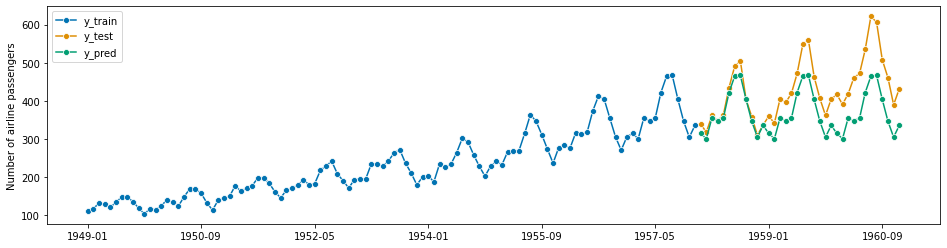

In [41]:
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])

### 3 & 4 Specify quantitative performance metric to compare acual data against predictions &  Compute forecast performance on the test set

In [42]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [43]:
mean_absolute_percentage_error(y_test, y_pred
                              )

0.145427686270316

In [44]:
#second option:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

In [45]:
mape = MeanAbsolutePercentageError(symmetric=False)

In [46]:
mape.greater_is_better

False

In [47]:
mape(y_test, y_pred)

0.13189432350948402

### 5. Test whether the performance is statistically better thatn a chosen baseline performance

NOTE: step 5 (testing) is currently not supported in sktime, but is on the development roadmap. For the time being, it is advised to use custom implementations of appropriate methods (e.g., Diebold-Mariano test; stationary confidence intervals).

# Try different forecasters

In [48]:
from sktime.utils import all_estimators

In [49]:
import pandas as pd

In [50]:
pd.DataFrame(all_estimators('forecaster'), columns=['name', 'class'])

ModuleNotFoundError: No module named 'hcrystalball'

In [ ]:
all_estimators('forecaster')

## Exponential smoothening

In [51]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [52]:
forecaster = ExponentialSmoothing(trend='add', seasonal='additive', sp=12)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

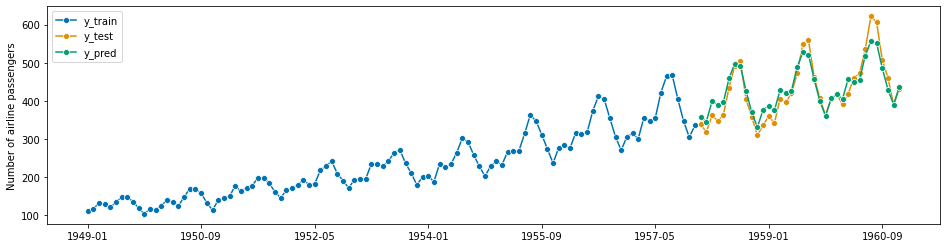

In [53]:
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])

In [54]:
mean_absolute_percentage_error(y_pred, y_test)

0.05027662159649058

## Auto ETS 

In [55]:
from sktime.forecasting.ets import AutoETS

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

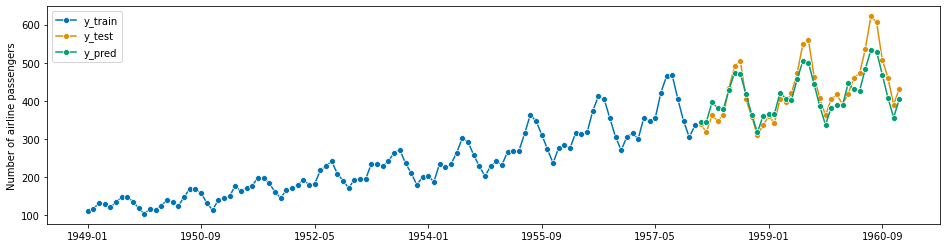

In [56]:
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])

In [58]:
mean_absolute_percentage_error(y_pred, y_test)

0.06317430647002534

## ARIMA and autoARIMA

In [59]:
from sktime.forecasting.arima import ARIMA

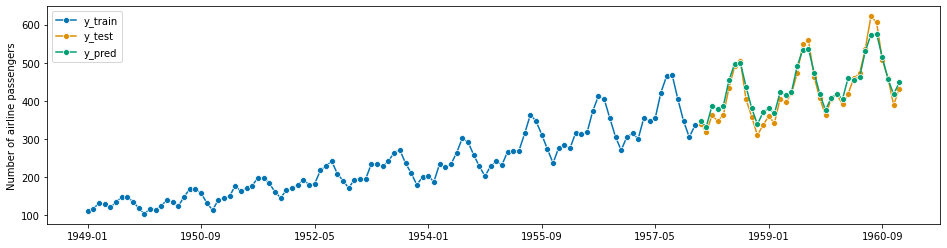

In [60]:
#for an ARIMA with set parameters TODO: How do you set parameters???
forecaster = ARIMA(order=(1,1,0), 
                seasonal_order=(0,1,0,12), 
                  suppress_warnings=True)
forecaster.fit(y_train)
y_pred= forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred']);

In [61]:
mean_absolute_percentage_error(y_pred, y_test)

0.04257105757347649

In [62]:
from sktime.forecasting.arima import AutoARIMA

This model automatically chooses the best parameters!

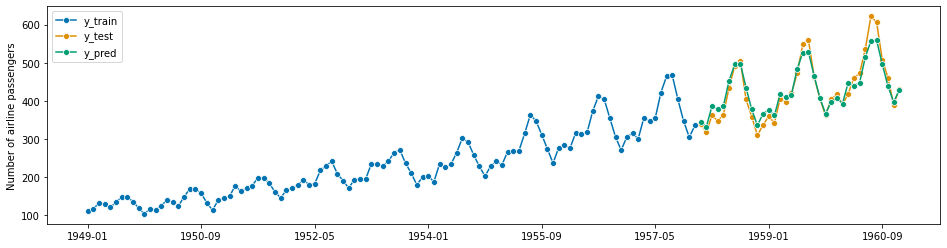

In [63]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred= forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred']);

In [64]:
forecaster.get_fitted_params()

{'ar.L1': -0.2411177593160947, 'sigma2': 92.74985957133522}

In [65]:
mean_absolute_percentage_error(y_pred, y_test)

0.04117062367046531

## BATS and TBATS

In [66]:
from sktime.forecasting.bats import BATS

In [67]:
forecaster =BATS(sp=12, use_trend=True, use_box_cox=False)

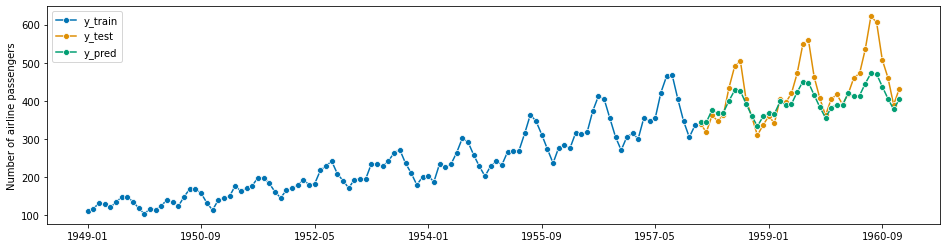

In [68]:
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [69]:
mean_absolute_percentage_error(y_pred, y_test)

0.08689500982369815

In [ ]:

from sktime.forecasting.tbats import TBATS

In [ ]:
forecaster = TBATS(sp=12, use_trend=True, use_box_cox=False)

In [ ]:
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [ ]:
mean_absolute_percentage_error(y_pred, y_test)

## FB Prophet

In [74]:
from sktime.forecasting.fbprophet import Prophet

In [75]:
#convert index to pd.DatetimeIndex
z = y.copy()
z = z.to_timestamp(freq='M')
z_train, z_test = temporal_train_test_split(z, test_size=36)

In [76]:
forecaster= Prophet(
    seasonality_mode = 'multiplicative',
    n_changepoints = int(len(y_train)/12),
    add_country_holidays = {'country_name':'Germany'},
    yearly_seasonality = True,
    weekly_seasonality = False,
    daily_seasonality = False
)


In [77]:
forecaster.fit(z_train)

Prophet(add_country_holidays={'country_name': 'Germany'},
        daily_seasonality=False, n_changepoints=9,
        seasonality_mode='multiplicative', weekly_seasonality=False,
        yearly_seasonality=True)

In [78]:
y_pred = forecaster.predict(fh.to_relative(cutoff = y_train.index[-1]))
y_pred.index = y_test.index

/Users/anaraquelpengelly/Desktop/imperial_postdoc/visa/time_series/python_time_series/sktime/lib/python3.8/site-packages/sktime/utils/datetime.py:55: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/Users/anaraquelpengelly/Desktop/imperial_postdoc/visa/time_series/python_time_series/sktime/lib/python3.8/site-packages/sktime/utils/datetime.py:56: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  return x.freqstr


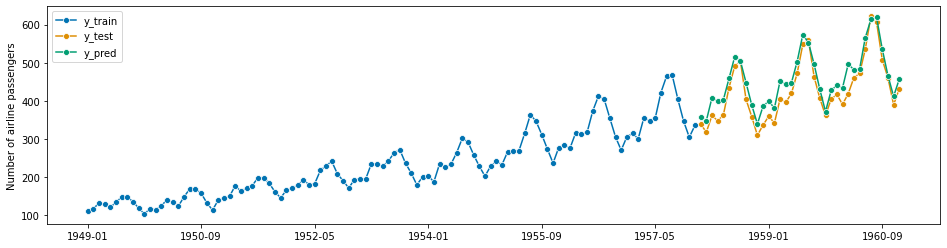

In [79]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

In [80]:
mean_absolute_percentage_error(y_pred, y_test)

0.06976085803353164

# Reduction: from forecasting to regression

In [81]:
# imports necessary for this chapter
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

# data loading for illustration (see section 1 for explanation)
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [83]:
from sklearn.neighbors import KNeighborsRegressor

In [84]:
from sktime.forecasting.compose import make_reduction

In [85]:
regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = make_reduction(regressor, window_length=15, strategy = 'recursive')

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

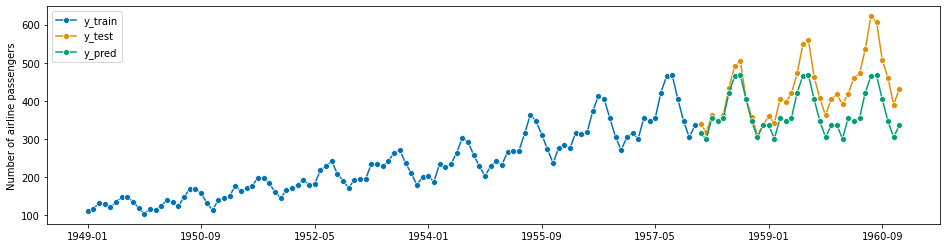

In [86]:
forecaster.fit(y_train)
y_pred =forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])


In [87]:
mean_absolute_percentage_error(y_pred, y_test)

0.14187443909112035